<a href="https://www.kaggle.com/heyrobin/spaceship-titanic-a-cosmic-mystery?scriptVersionId=88930798" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<center><img src="https://github.com/heyrobin/Space-Titanic/blob/main/Banner-optimized.gif?raw=true">

# <center> <span style="font-family:Georgia"> <span style="color:white;display:fill;border-radius:8px;background-color:#272233;font-size:120%;">ㅤIntroductionㅤ</span><a id="1"></a> 

In the beginning, October 4, 1957, Sputnik the first satellite launched to space, and then on 1 Dec 1958 NASA was formed since the space race began from Neil Armstrong Edwin & "Buzz" Aldrin became the first humans ever to land on the moon to the Elon musk the first person to successfully completing the mission to the mars it became the race of curiosity but this is all history.

In the year 2912, We've received a transmission from four lightyears away and things aren't looking good. Spaceship Titanic is an interstellar passenger liner named after the great titanic with 13,000 passengers on board transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

Mission: We have been summoned by the ISO (intergalactic scientist organization) to rescue crews and retrieve the lost passengers which were transported by the anomaly. We have given records and data recovered from the spaceship's damaged computer system.

<strong>Data</strong> - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
<ul><li><code>PassengerId</code> - A unique Id for each passenger. Each Id takes the form <code>gggg_pp</code> where <code>gggg</code> indicates a group the passenger is travelling with and <code>pp</code> is their number within the group. People in a group are often family members, but not always.</li>
<li><code>HomePlanet</code> - The planet the passenger departed from, typically their planet of permanent residence.</li>
<li><code>CryoSleep</code> - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.</li>
<li><code>Cabin</code> - The cabin number where the passenger is staying. Takes the form <code>deck/num/side</code>, where <code>side</code> can be either <code>P</code> for <em>Port</em> or <code>S</code> for <em>Starboard</em>.</li>
<li><code>Destination</code> - The planet the passenger will be debarking to.</li>
<li><code>Age</code> - The age of the passenger.</li>
<li><code>VIP</code> - Whether the passenger has paid for special VIP service during the voyage.</li>
<li><code>RoomService</code>, <code>FoodCourt</code>, <code>ShoppingMall</code>, <code>Spa</code>, <code>VRDeck</code> - Amount the passenger has billed at each of the <em>Spaceship Titanic</em>'s many luxury amenities.</li>
<li><code>Name</code> - The first and last names of the passenger.</li>
<li><code>Transported</code> - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.</li></ul></li>

In [1]:
'''Analysis'''

import numpy as np 
import pandas as pd
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt

'''Pre-Processing'''
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

'''Modeling-Metrics'''
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

'''Dataset'''
train = pd.read_csv('../input/spaceship-titanic/train.csv')
test = pd.read_csv('../input/spaceship-titanic/test.csv')

In [2]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
train.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

# <center> <span style="font-family:Georgia"> <span style="color:white;display:fill;border-radius:8px;background-color:#272233;font-size:120%;">ㅤ🌠 Exploritory Data Analysisㅤ</span><a id="1"></a> 

<center><img src="https://github.com/heyrobin/Space-Titanic/blob/main/homeplanets.gif?raw=true">

<h1 id="1"><b><span style="color:#55D3E2">|</span> HomePlanet</b></h1>

In [5]:
cnt_srs =train['HomePlanet'].value_counts()

trace = go.Scatter(
    x=cnt_srs.index,
    y=cnt_srs.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 20,
        size = cnt_srs.values,
        color = ['#1D7595','#B9B596','#864D29']

    ),
)

layout = go.Layout(
    title='<b>Home Planets</b>', 
    title_x=0.5,
    titlefont=dict(size =20, color='black', family='Space Mono'),
    plot_bgcolor='rgba(0,0,0,0)'
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
fig.update_xaxes(showline=True, linewidth=2,
                 #linecolor=colors[3]
                )
fig.update_yaxes(showline=True, linewidth=2,
                 #linecolor=colors[3]
                )
py.iplot(fig, filename="Size of the Company/Clan")


* **Earth** : 4602
* **Europa** : 2131
* **Mars** : 1759

<h1 id="1"><b><span style="color:#55D3E2">|</span> Destination </b></h1>

In [6]:
cnt_srs =train['Destination'].value_counts()

trace = go.Scatter(
    x=cnt_srs.index,
    y=cnt_srs.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 20,
        size = cnt_srs.values,
        color = ['#048B95','#A1231F','#602F58']
    ),
)



layout = go.Layout(
    title='<b>Destination</b>', 
    title_x=0.5,
    titlefont=dict(size =20, color='black', family='Space Mono'),
    
    plot_bgcolor='rgba(0,0,0,0)'
)

fig = go.Figure(data=[trace], layout=layout)

sources = "https://assets.stickpng.com/images/580b585b2edbce24c47b2d2a.png"
# add images

fig.add_layout_image(
        source=sources,
        xref="x domain",
        yref="y domain",
        x=0.2,
        y=0.8,
        xanchor="right",
        yanchor="top",
        sizex=1,
        sizey=0.7,
        opacity=False
    )

fig.update_xaxes(showline=True, linewidth=2)
fig.update_yaxes(showline=True, linewidth=2)

* **TRAPPIST-1e** : 5915
* **55 Cancri e** : 1800
* **PSO J318.5-22** : 796

<h1 id="1"><b><span style="color:#55D3E2">|</span> Age Distribution </b></h1>

In [7]:
trace = go.Histogram(x=train['Age'], 
                           histnorm='percent',
                           xbins=dict(
                               start=0,
                               end=100,
                               size=1),
                           marker_color='#048B95',
                          )
             

layout = go.Layout(
    title='<b>Age Distribution</b>', 
    title_x=0.5,
    titlefont=dict(size =20, color='black', family='Space Mono'),
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis_title='Age', 
    yaxis_title='Percent'
)


fig = go.Figure(data=[trace], layout=layout)

fig.update_xaxes(showline=True, linewidth=2)
fig.update_yaxes(showline=True, linewidth=2)

py.iplot(fig, filename="planets")


# <center> <span style="font-family:Georgia"> <span style="color:white;display:fill;border-radius:8px;background-color:#272233;font-size:120%;">ㅤ🛸 Modelㅤ</span><a id="1"></a> 

In [8]:
# taking target variable and droping it
y = train['Transported']
train = train.drop('Transported', axis = 1)

In [9]:
# droping features which we dont seems relevent for now

#cols_to_drop = ['Name','PassengerId']
cols_to_drop = ['Name','PassengerId','Cabin']
def drop(train,test,cols):
    train.drop(cols,axis=1, inplace =True)
    test.drop(cols,axis=1, inplace =True)
    print('sucessfully droped features')

drop(train,test,cols_to_drop)

sucessfully droped features


In [10]:
#train[['Deck', 'Num', 'Side']] = train['Cabin'].str.split('/', expand=True)
#test[['Deck', 'Num', 'Side']] = train['Cabin'].str.split('/', expand=True)

In [11]:
# getting categorical and numerical features
cat_col = [col for col in train.columns if train[col].dtype not in ["float64"]]
num_col = [col for col in train.columns if train[col].dtype in ["float64"]]

### Handling Missing Values /Imputation

In [12]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(random_state=0, max_iter=10, initial_strategy='mean')

train[num_col] = imputer.fit_transform(train[num_col])
test[num_col] = imputer.fit_transform(test[num_col])

In [13]:
train[cat_col] = train[cat_col].fillna('Nan')
test[cat_col] = test[cat_col].fillna('Nan')

In [14]:
def label_encoder(df,df2,columns):
    for col in columns:
        df[col] = df[col].astype(str)
        df2[col] = df2[col].astype(str)
        df[col] = LabelEncoder().fit_transform(df[col])
        df2[col] =  LabelEncoder().fit_transform(df2[col])
    return df

label_encoder(train,test,cat_col)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1,0,3,39.0,0,0.0,0.0,0.0,0.0,0.0
1,0,0,3,24.0,0,109.0,9.0,25.0,549.0,44.0
2,1,0,3,58.0,2,43.0,3576.0,0.0,6715.0,49.0
3,1,0,3,33.0,0,0.0,1283.0,371.0,3329.0,193.0
4,0,0,3,16.0,0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,41.0,2,0.0,6819.0,0.0,1643.0,74.0
8689,0,2,2,18.0,0,0.0,0.0,0.0,0.0,0.0
8690,0,0,3,26.0,0,0.0,0.0,1872.0,1.0,0.0
8691,1,0,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0


In [15]:
X = train

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
models = {"LogisticClassifier":LogisticRegression(solver='liblinear'),
          "KNearest": KNeighborsClassifier(),
          "Support Vector Classifier": SVC(),
          "DecisionTreeClassifier": DecisionTreeClassifier(),
          "XGBClassifier":XGBClassifier(),
          "LightLGBM Classifier":LGBMClassifier(),
          #"CatBoostClassifier":CatBoostClassifier()
          }

In [18]:
for name, vals in models.items():
    model = vals.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test,y_pred)
    print(f'{name} accuracy is {score}')

LogisticClassifier accuracy is 0.7692575810386895
KNearest accuracy is 0.7678633670268387
Support Vector Classifier accuracy is 0.77448588358313
DecisionTreeClassifier accuracy is 0.7215057511327989
[11:04:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier accuracy is 0.7814569536423841
LightLGBM Classifier accuracy is 0.7905193447194144


## Hyper Parameter Tuning

In [19]:
"""import optuna
from sklearn.model_selection import cross_val_score

def objective(trial):
             
      n_estimators = trial.suggest_int("n_estimators", 50, 200)
      learning_rate = trial.suggest_float("learning_rate", 0.01, 0.3)
      num_leaves = trial.suggest_int("num_leaves", 20, 3000, step=20)
      max_depth = trial.suggest_int("max_depth", 3, 12)
      min_data_in_leaf = trial.suggest_int("min_data_in_leaf", 200, 10000, step=100)
      lambda_l1 = trial.suggest_int("lambda_l1", 0, 100, step=5)
      lambda_l2 = trial.suggest_int("lambda_l2", 0, 100, step=5)
      min_gain_to_split = trial.suggest_float("min_gain_to_split", 0, 15)
      bagging_fraction = trial.suggest_float("bagging_fraction", 0.2, 0.95, step=0.1)
      bagging_freq = trial.suggest_categorical("bagging_freq", [1])
      feature_fraction = trial.suggest_float("feature_fraction", 0.2, 0.95, step=0.1)
        
      lgbc = LGBMClassifier(n_estimators=n_estimators,
                            #max_depth=max_depth,
                            learning_rate=learning_rate,
                            #num_leaves =num_leaves,
                            max_depth=max_depth,
                            min_data_in_leaf=min_data_in_leaf,
                            #lambda_l1=lambda_l1,
                            #lambda_l2=lambda_l2,
                            #min_gain_to_split=min_gain_to_split,
                            #bagging_fraction=bagging_fraction,
                            #bagging_freq=bagging_freq,
                            #feature_fraction=feature_fraction
                           )
    
      return cross_val_score(lgbc,
                             X,
                             y,
                             n_jobs=-1,
                             cv=3).mean()
                             
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

trial = study.best_trial
print('Accuracy: {}'.format(trial.value))

print("Best hyperparameters: {}".format(trial.params))

best_params = trial.params

                             
"""

'import optuna\nfrom sklearn.model_selection import cross_val_score\n\ndef objective(trial):\n             \n      n_estimators = trial.suggest_int("n_estimators", 50, 200)\n      learning_rate = trial.suggest_float("learning_rate", 0.01, 0.3)\n      num_leaves = trial.suggest_int("num_leaves", 20, 3000, step=20)\n      max_depth = trial.suggest_int("max_depth", 3, 12)\n      min_data_in_leaf = trial.suggest_int("min_data_in_leaf", 200, 10000, step=100)\n      lambda_l1 = trial.suggest_int("lambda_l1", 0, 100, step=5)\n      lambda_l2 = trial.suggest_int("lambda_l2", 0, 100, step=5)\n      min_gain_to_split = trial.suggest_float("min_gain_to_split", 0, 15)\n      bagging_fraction = trial.suggest_float("bagging_fraction", 0.2, 0.95, step=0.1)\n      bagging_freq = trial.suggest_categorical("bagging_freq", [1])\n      feature_fraction = trial.suggest_float("feature_fraction", 0.2, 0.95, step=0.1)\n        \n      lgbc = LGBMClassifier(n_estimators=n_estimators,\n                         

In [20]:
#optuna.visualization.plot_optimization_history(study)
#optuna.visualization.plot_slice(study)

In [21]:
lgbc = LGBMClassifier(
    #**best_params
).fit(X_train, y_train)
y_pred = lgbc.predict(X_test)
score=accuracy_score(y_test,y_pred)
print(score)

0.7905193447194144


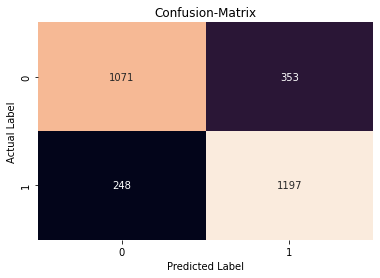

In [22]:
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot = True,
                cbar= False,
                fmt='g',
               #cmap= theme
               )
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion-Matrix');

In [23]:
sub = pd.read_csv('../input/spaceship-titanic/sample_submission.csv')
sub['Transported'] = lgbc.predict(test)
sub.to_csv('submission.csv',index=False)
sub.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


# <center> <span style="font-family:Georgia"> <span style="color:white;display:fill;border-radius:8px;background-color:#272233;font-size:120%;">ㅤ🚧 Work in Progress 🚧ㅤ</span><a id="1"></a> 